Initial shape: (13934, 88)
Missing values in price: 0
Shape after removing price outliers: (13791, 88)


count    13791.000000
mean        99.923283
std         71.445665
min          8.000000
25%         53.000000
50%         81.000000
75%        123.000000
max        500.000000
Name: price, dtype: float64

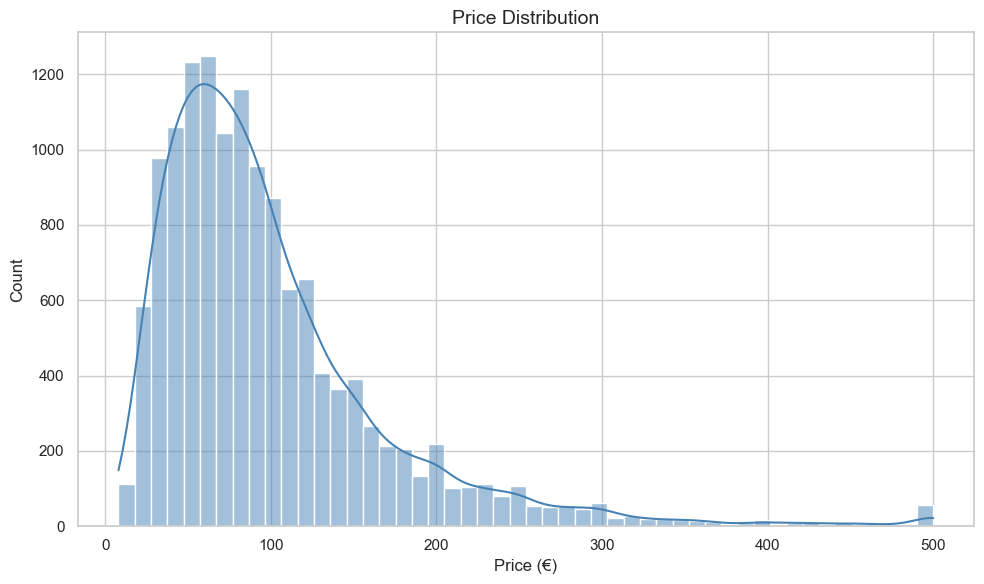

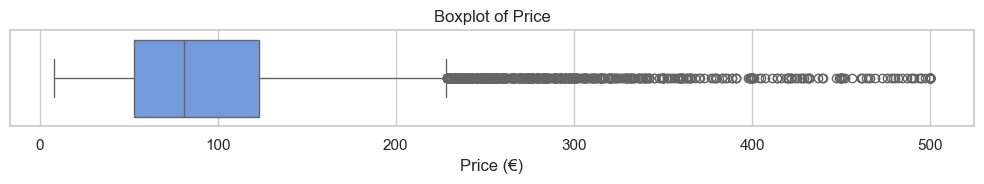

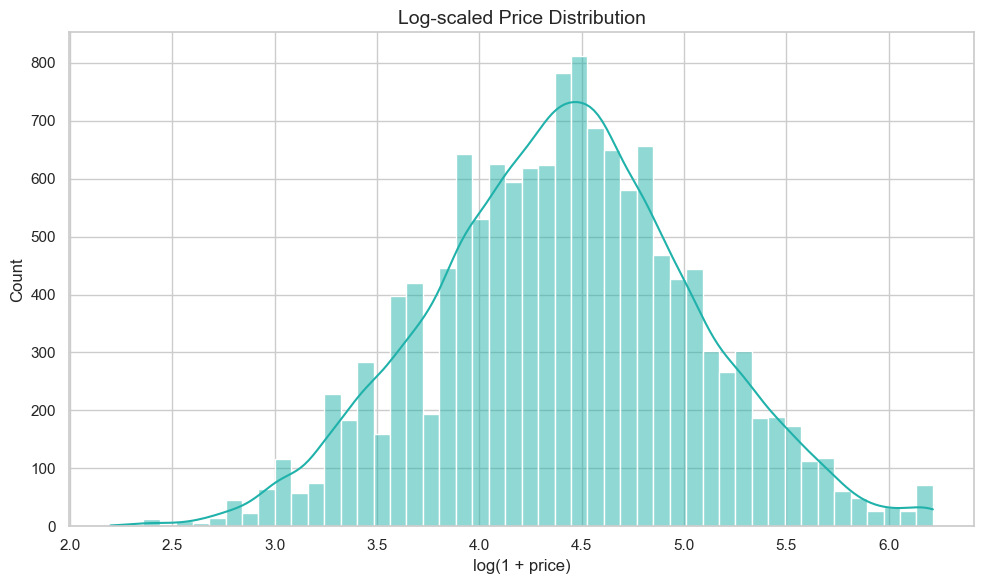

In [81]:
# Set Seaborn style
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

# Read the dataset with low_memory=False to avoid dtype warnings
df = pd.read_csv(r'C:\Users\thage\Desktop\airbnb-price-prediction-main\data\processed\airbnb_merged_listing_level.csv', low_memory=False)

print("Initial shape:", df.shape)
# Drop rows with missing or invalid prices
df = df[pd.to_numeric(df['price'], errors='coerce').notnull()]
df['price'] = df['price'].astype(float)

print("Missing values in price:", df['price'].isna().sum())

# Optional: Clip prices above 500€ for cleaner visuals
df = df[df['price'] <= 500]

print("Shape after removing price outliers:", df.shape)
display(df['price'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color="#4682B4", edgecolor="white")
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'], color="#6495ED")
plt.title("Boxplot of Price")
plt.xlabel("Price (€)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['price']), bins=50, kde=True, color="#20B2AA", edgecolor="white")
plt.title("Log-scaled Price Distribution", fontsize=14)
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




Room Types and Counts:
room_type
Entire home/apt    9377
Private room       4251
Hotel room           91
Shared room          72
Name: count, dtype: int64


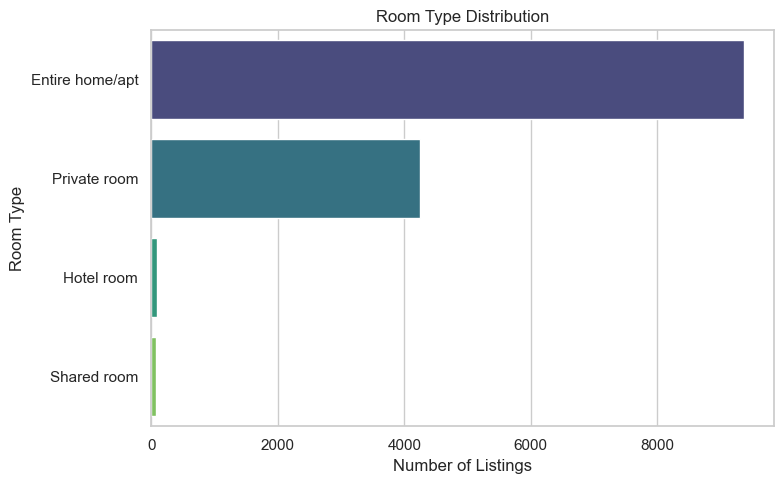

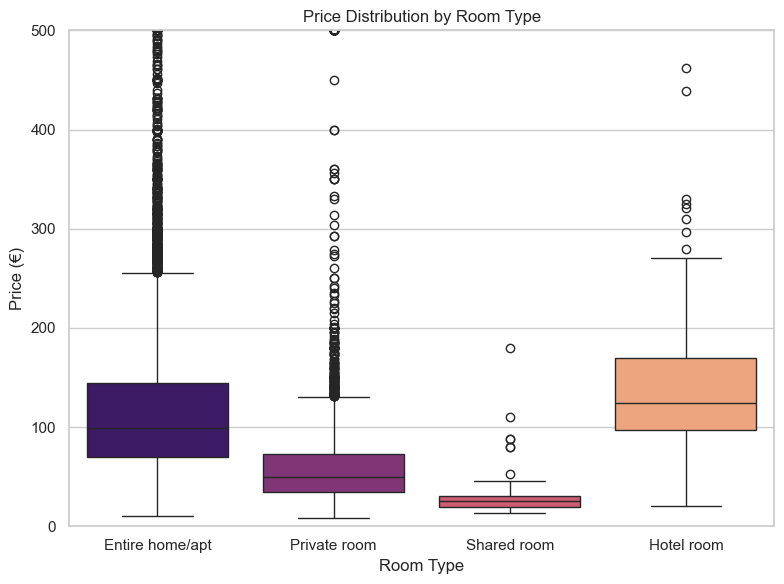

Average price per room type:
room_type
Hotel room         147.395604
Entire home/apt    116.816679
Private room        62.798636
Shared room         31.694444
Name: price, dtype: float64


In [82]:
# Display unique room types and their counts
room_counts = df['room_type'].value_counts()
print("Room Types and Counts:")
print(room_counts)
# Horizontal barplot showing the distribution of room types
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
sns.barplot(y=room_counts.index, x=room_counts.values, hue=room_counts.index, palette="viridis", legend=False)

plt.title("Room Type Distribution")
plt.xlabel("Number of Listings")
plt.ylabel("Room Type")
plt.tight_layout()
plt.show()
# Boxplot showing price distribution for each room type
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='room_type', y='price', hue='room_type', palette='magma', legend=False)

plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (€)")
plt.ylim(0, 500)  # limit y-axis to reduce effect of extreme outliers
plt.tight_layout()
plt.show()
# Calculate and display the average price per room type
avg_price_by_room = df.groupby("room_type")["price"].mean().sort_values(ascending=False)
print("Average price per room type:")
print(avg_price_by_room)
